Donot Dataset

We will analyse information to federal campaign.



We will now look at the Donor Data Set

The questions we will be trying to answer while looking at this Data Set is:

1.) How much was donated and what was the average donation?

2.) How did the donations differ between candidates?

3.) How did the donations differ between Democrats and Republicans?

4.) What were the demographics of the donors?

5.) Is there a pattern to donation amounts?

Dataset is huge in size, can be found at https://www.kaggle.com/kadser/analysis-of-romney-vs-obama

In [2]:
#For data
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

#For visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [4]:
donor_df = pd.read_csv(r'Election_Donor_Data.csv')

In [5]:
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [6]:
donor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
cmte_id              1001731 non-null object
cand_id              1001731 non-null object
cand_nm              1001731 non-null object
contbr_nm            1001731 non-null object
contbr_city          1001712 non-null object
contbr_st            1001727 non-null object
contbr_zip           1001620 non-null object
contbr_employer      988002 non-null object
contbr_occupation    993301 non-null object
contb_receipt_amt    1001731 non-null float64
contb_receipt_dt     1001731 non-null object
receipt_desc         14166 non-null object
memo_cd              92482 non-null object
memo_text            97770 non-null object
form_tp              1001731 non-null object
file_num             1001731 non-null int64
dtypes: float64(1), int64(1), object(14)
memory usage: 122.3+ MB


Average donation amount and top donation amount

In [19]:
donor_df['contb_receipt_amt'].value_counts().head(20)

100.00     178188
50.00      137584
25.00      110345
250.00      91182
500.00      57984
2500.00     49005
35.00       37237
1000.00     36494
10.00       33986
200.00      27813
20.00       17565
15.00       16163
150.00      14600
75.00       13647
201.20      11718
30.00       11381
300.00      11204
20.12        9897
5.00         9024
40.00        5007
Name: contb_receipt_amt, dtype: int64

In [13]:
don_mean = donor_df['contb_receipt_amt'].mean()
don_std = donor_df['contb_receipt_amt'].std()
print("The average donation was %.2f with a std %.2f"%(don_mean,don_std))

The average donation was 298.24 with a std 3749.67


In [21]:
top_donor = donor_df['contb_receipt_amt'].copy()

top_donor.sort_values()

top_donor

0           250.0
1            50.0
2           250.0
3           250.0
4           300.0
5           500.0
6           250.0
7           250.0
8           250.0
9           250.0
10          250.0
11          500.0
12          250.0
13          250.0
14          250.0
15          300.0
16          500.0
17         1000.0
18          250.0
19          300.0
20          500.0
21          250.0
22         2500.0
23         2500.0
24          150.0
25          200.0
26          100.0
27          250.0
28          500.0
29          250.0
            ...  
1001701    2500.0
1001702    2500.0
1001703   -2500.0
1001704   -2500.0
1001705    1000.0
1001706    2500.0
1001707   -2500.0
1001708    2500.0
1001709   -2500.0
1001710   -2500.0
1001711    1000.0
1001712    2500.0
1001713    2500.0
1001714     250.0
1001715     250.0
1001716    1000.0
1001717     100.0
1001718    2500.0
1001719    2500.0
1001720     100.0
1001721     250.0
1001722     100.0
1001723     100.0
1001724     500.0
1001725   

Negative values are refunds, eliminate them with condition.

In [22]:
top_donor = top_donor[top_donor > 0]

top_donor.sort_values()

335573          0.01
335407          0.01
335352          0.01
324596          0.01
329896          0.01
318560          0.01
335100          0.01
318670          0.01
329984          0.01
335087          0.01
335033          0.01
330220          0.01
330222          0.01
324283          0.01
324170          0.01
334913          0.01
334899          0.01
323823          0.01
324778          0.01
323822          0.01
324838          0.01
324876          0.01
336020          0.01
317634          0.01
325344          0.01
335767          0.01
317753          0.01
325153          0.01
325151          0.01
350626          0.01
             ...    
710177      10000.00
709608      10000.00
99829       10000.00
711167      10000.00
993178      10000.00
710198      10000.00
708928      10000.00
708022      10000.00
709739      10000.00
709859      10000.00
709813      10000.00
708919      10000.00
708138      10000.00
876244      10000.00
91145       10000.00
708898      10000.00
710730      1

In [23]:
top_donor.value_counts().head(10)

100.0     178188
50.0      137584
25.0      110345
250.0      91182
500.0      57984
2500.0     49005
35.0       37237
1000.0     36494
10.0       33986
200.0      27813
Name: contb_receipt_amt, dtype: int64

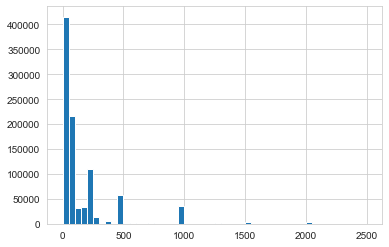

In [26]:
com_don = top_donor[top_donor < 2500]

com_don.hist(bins=50)

Seperate the donations by party

In [27]:
candidates = donor_df.cand_nm.unique()

candidates

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [28]:


#dictionary of party affiliation

party_map = {'Bachmann, Michelle': "Republican", 
             'Romney, Mitt': "Republican", 
             'Obama, Barack': "Democrat",
             "Roemer, Charles E. 'Buddy' III": "Republican",
             'Pawlenty, Timothy': "Republican",
             'Johnson, Gary Earl': "Republican",
             'Paul, Ron': "Republican",
             'Santorum, Rick': "Republican",
             'Cain, Herman': "Republican",
             'Gingrich, Newt': "Republican",
             'McCotter, Thaddeus G': "Republican",
             'Huntsman, Jon': "Republican",
             'Perry, Rick': "Republican"}

#lets map the candidates and their affiliation
donor_df['Party'] = donor_df.cand_nm.map(party_map)

In [29]:
donor_df = donor_df[donor_df.contb_receipt_amt >0]

In [30]:
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,Party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


In [31]:
donor_df.groupby('cand_nm')['contb_receipt_amt'].count()

cand_nm
Bachmann, Michelle                 13082
Cain, Herman                       20052
Gingrich, Newt                     46883
Huntsman, Jon                       4066
Johnson, Gary Earl                  1234
McCotter, Thaddeus G                  73
Obama, Barack                     589127
Paul, Ron                         143161
Pawlenty, Timothy                   3844
Perry, Rick                        12709
Roemer, Charles E. 'Buddy' III      5844
Romney, Mitt                      105155
Santorum, Rick                     46245
Name: contb_receipt_amt, dtype: int64

Now lets see dollar amount

In [32]:
donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()

cand_nm
Bachmann, Michelle                2.711439e+06
Cain, Herman                      7.101082e+06
Gingrich, Newt                    1.283277e+07
Huntsman, Jon                     3.330373e+06
Johnson, Gary Earl                5.669616e+05
McCotter, Thaddeus G              3.903000e+04
Obama, Barack                     1.358774e+08
Paul, Ron                         2.100962e+07
Pawlenty, Timothy                 6.004819e+06
Perry, Rick                       2.030575e+07
Roemer, Charles E. 'Buddy' III    3.730099e+05
Romney, Mitt                      8.833591e+07
Santorum, Rick                    1.104316e+07
Name: contb_receipt_amt, dtype: float64

In [33]:


cand_amount = donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()

#let's clean out the numbers
i = 0

for don in cand_amount:
    print('The candidate %s raise %.0f dollars' %(cand_amount.index[i],don))
    print('\n')
    i += 1



The candidate Bachmann, Michelle raise 2711439 dollars


The candidate Cain, Herman raise 7101082 dollars


The candidate Gingrich, Newt raise 12832770 dollars


The candidate Huntsman, Jon raise 3330373 dollars


The candidate Johnson, Gary Earl raise 566962 dollars


The candidate McCotter, Thaddeus G raise 39030 dollars


The candidate Obama, Barack raise 135877427 dollars


The candidate Paul, Ron raise 21009620 dollars


The candidate Pawlenty, Timothy raise 6004819 dollars


The candidate Perry, Rick raise 20305754 dollars


The candidate Roemer, Charles E. 'Buddy' III raise 373010 dollars


The candidate Romney, Mitt raise 88335908 dollars


The candidate Santorum, Rick raise 11043159 dollars




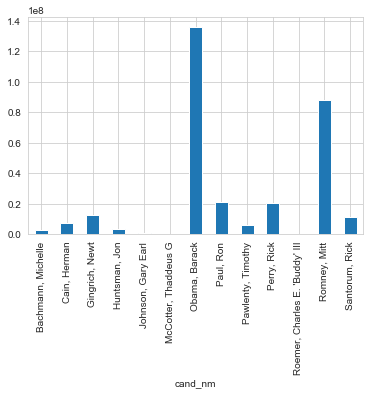

In [34]:
#plot candidate's donation value
cand_amount.plot(kind='bar')



As an individual candidate, Obama had the highest amount of donations



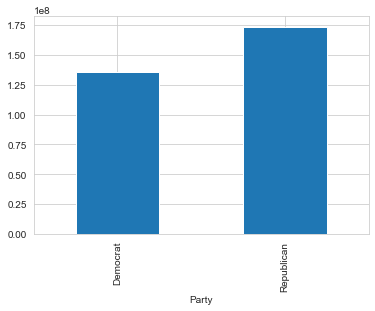

In [35]:
donor_df.groupby('Party')['contb_receipt_amt'].sum().plot(kind="bar")

Although Obama had the most donations(and is the only democratic candidate), the total donations did not exceed the total donations for the party. On the other hand these donations were spread between multiple candidates

In [36]:


occupation_df = donor_df.pivot_table('contb_receipt_amt', index='contbr_occupation', columns='Party',aggfunc='sum')



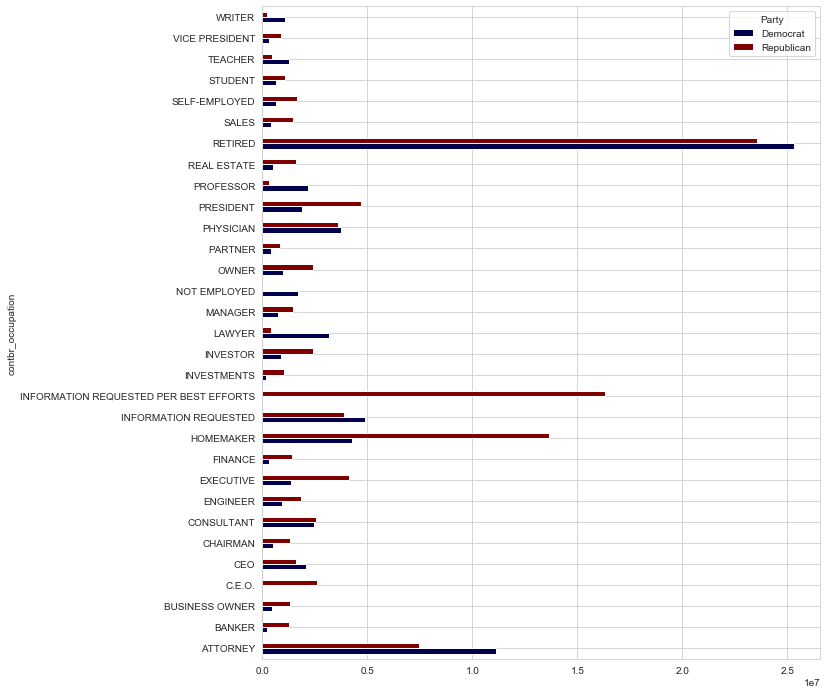

In [37]:
occupation_df.tail()
occupation_df.shape
occupation_df = occupation_df[occupation_df.sum(1) > 1000000]
occupation_df.plot(kind='barh',figsize=(10,12), cmap='seismic')

In [38]:
occupation_df.drop(['INFORMATION REQUESTED PER BEST EFFORTS', 'INFORMATION REQUESTED'],axis=0,inplace = True)

In [39]:
occupation_df.loc['CEO'] = occupation_df.loc['CEO'] + occupation_df.loc['C.E.O.']

In [40]:
occupation_df.drop(['C.E.O.'], inplace = True)

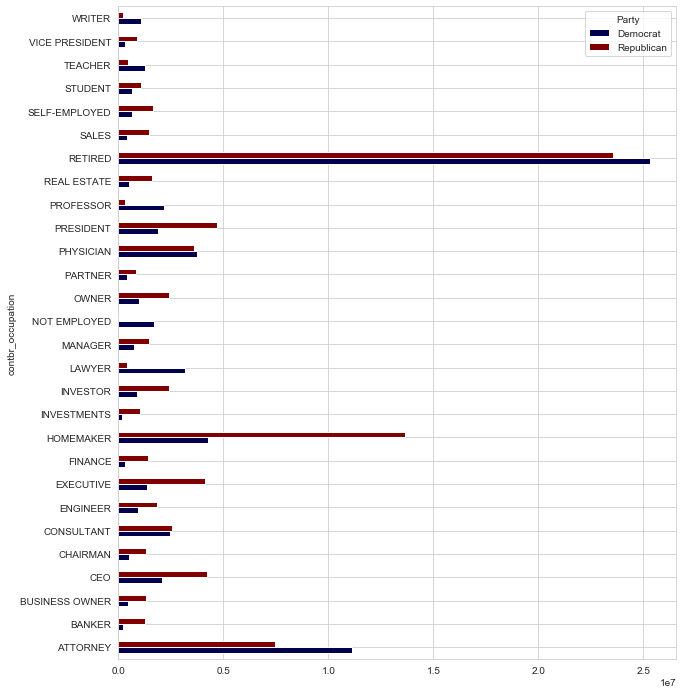

In [41]:
occupation_df.plot(kind='barh',figsize=(10,12), cmap='seismic')